In [102]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [103]:
df=pd.read_csv("./data/finalTrain2.csv")

In [104]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41


In [105]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [106]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Order_Date                      object
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
dtype: object

In [107]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [108]:
df.shape

(45584, 20)

In [109]:
from math import radians, sin, cos, sqrt, atan2

def distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in kilometers

    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    # Calculate the differences in latitude and longitude
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Calculate the distance using the Haversine formula
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1-a))
    distance = R * c

    return distance
# Create distance column & calculate the distance
df['distance'] = np.nan

for i in range(len(df)):
  df.loc[i, 'distance'] = distance(df.loc[i, 'Restaurant_latitude'], 
                                          df.loc[i, 'Restaurant_longitude'], 
                                          df.loc[i, 'Delivery_location_latitude'], 
                                          df.loc[i, 'Delivery_location_longitude'])

In [110]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618


In [111]:
df['orderdate'] = df['Order_Date'].apply(lambda x: x.split('-',1)[0])


In [112]:
df['ordermonth'] = df['Order_Date'].apply(lambda x: x.split('-',2)[1])


In [113]:
df.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),distance,orderdate,ordermonth
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,10.280582,12,02
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,6.242319,13,02
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,...,1,Drinks,scooter,1.0,No,Metropolitian,21,13.787860,04,03
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2.930258,13,02
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,...,1,Snack,scooter,1.0,No,Metropolitian,41,19.396618,14,02


In [114]:
df.drop('Order_Date',axis=1,inplace=True)

In [115]:
df.shape

(45584, 22)

In [116]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
distance                          0
orderdate                         0
ordermonth                        0
dtype: int64

In [117]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [118]:
df['Weather_conditions'] = df['Weather_conditions'].fillna(df['Weather_conditions'].mode()[0])

In [119]:
df['multiple_deliveries'] = df['multiple_deliveries'].fillna(df['multiple_deliveries'].mode()[0])

In [120]:
df['Festival'] = df['Festival'].fillna(df['Festival'].mode()[0])

In [121]:
df['Road_traffic_density'] = df['Road_traffic_density'].fillna(df['Road_traffic_density'].mode()[0])

In [122]:
df['Delivery_person_Age'] = df['Delivery_person_Age'].fillna(df['Delivery_person_Age'].mean())

In [123]:
df['Delivery_person_Ratings'] = df['Delivery_person_Ratings'].fillna(df['Delivery_person_Ratings'].mean())

In [124]:
df['Time_Orderd'] = df['Time_Orderd'].fillna(df['Time_Orderd'].mode()[0])


In [125]:


time_pattern = re.compile(r'^\d{1,2}:\d{2}$')
df['Time_Orderd'] = df['Time_Orderd'].apply(lambda x: x if time_pattern.match(x) else None)

In [126]:


time_pattern = re.compile(r'^\d{1,2}:\d{2}$')
df['Time_Order_picked'] = df['Time_Order_picked'].apply(lambda x: x if time_pattern.match(x) else None)

In [127]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age               0
Delivery_person_Ratings           0
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    4068
Time_Order_picked              5007
Weather_conditions                0
Road_traffic_density              0
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries               0
Festival                          0
City                              0
Time_taken (min)                  0
distance                          0
orderdate                         0
ordermonth                        0
dtype: int64

In [128]:
df.shape

(45584, 22)

In [129]:
df['Time_Orderd'].mode()[0]

'21:55'

In [130]:
df['Time_Orderd'] = df['Time_Orderd'].fillna(method='ffill')


In [131]:
df['Time_Order_picked'] = df['Time_Order_picked'].fillna(method='ffill')


In [132]:
for i in df.columns:
    print("\n================================================================")
    print(i)
    print(df[i].unique())


ID
['0xcdcd' '0xd987' '0x2784' ... '0x4f8d' '0x5eee' '0x5fb2']

Delivery_person_ID
['DEHRES17DEL01' 'KOCRES16DEL01' 'PUNERES13DEL03' ... 'KOCRES04DEL01'
 'BHPRES06DEL03' 'GOARES03DEL03']

Delivery_person_Age
[36.         21.         23.         34.         24.         29.
 35.         33.         25.         31.         37.         27.
 32.         26.         38.         20.         22.         29.56691059
 28.         39.         30.         15.         50.        ]

Delivery_person_Ratings
[4.2       4.7       4.3       4.5       4.        4.9       4.1
 5.        4.8       3.5       4.6       4.6337737 4.4       3.8
 3.9       3.7       2.6       2.5       3.6       3.1       2.7
 1.        3.2       3.3       6.        3.4       2.8       2.9
 3.       ]

Restaurant_latitude
[ 30.327968  10.003064  18.56245   30.899584  26.463504  19.176269
  12.311072  18.592718  17.426228  22.552672  18.563934  23.357804
  11.003669  12.986047  19.221315  13.005801  26.849596  21.160522
  12.93

In [133]:
## Seggregate numerical and categorical Columns
numerical_columns=df.columns[df.dtypes!='object']
categorical_columns=df.columns[df.dtypes=='object']

In [134]:
df[numerical_columns].describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min),distance
count,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.750197,26.293963,99.321320
std,5.695578,0.327663,8.185674,22.885575,7.335562,21.120578,0.839055,0.567465,9.384298,1099.839139
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000,1.465067
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000,4.663493
50%,29.566911,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000,9.264356
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000,13.763977
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,19692.674606


In [135]:
df[categorical_columns].describe()

,ID,Delivery_person_ID,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Type_of_order,Type_of_vehicle,Festival,City,orderdate,ordermonth
count,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584,45584
unique,45584,1320,160,174,6,4,4,4,2,3,30,3
top,0xcdcd,JAPRES11DEL02,21:55,21:30,Fog,Low,Snack,motorcycle,No,Metropolitian,03,03
freq,1,67,2422,554,8269,16077,11530,26429,44688,35287,2328,31981


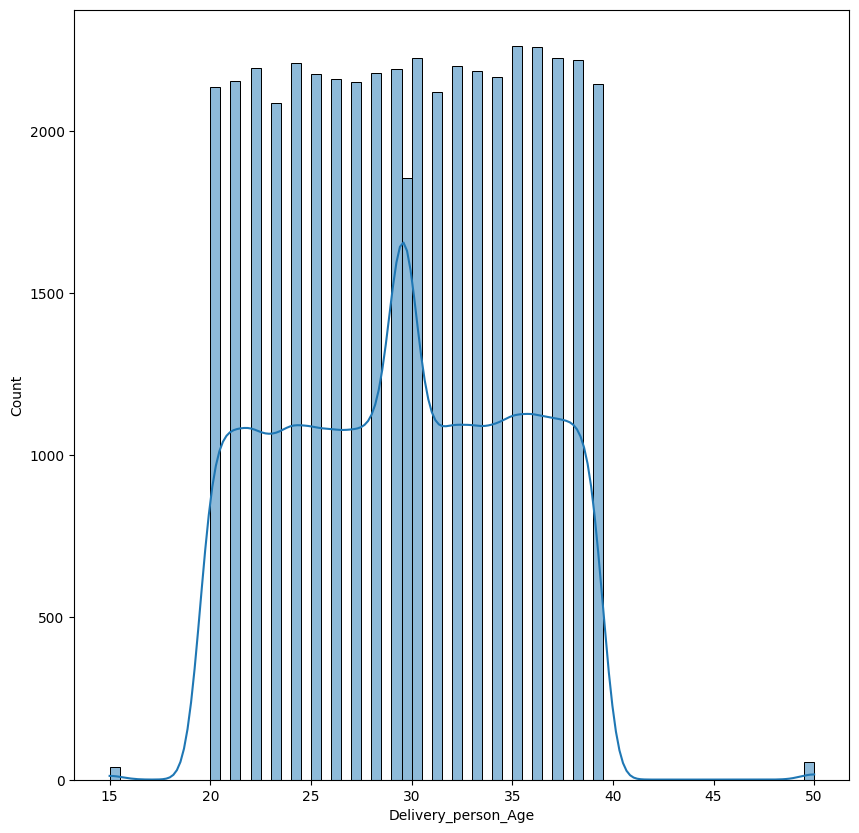

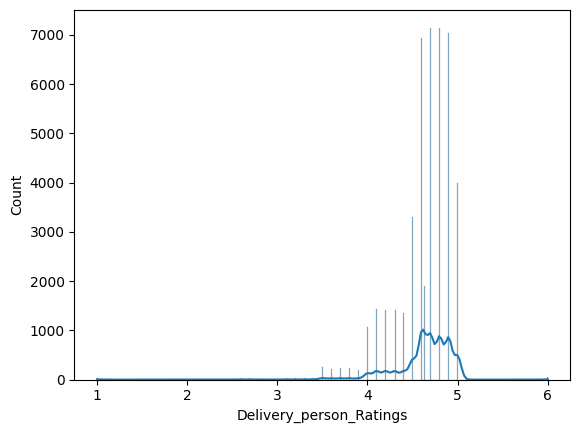

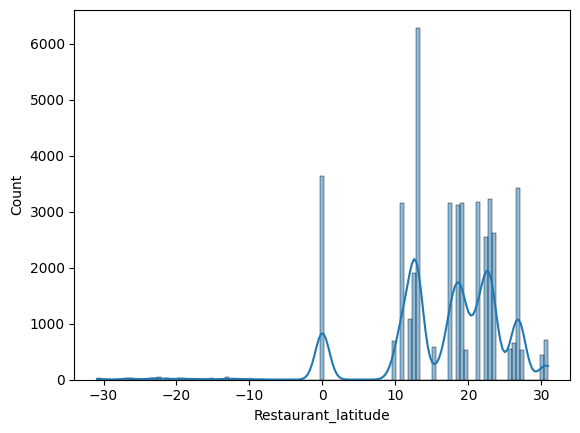

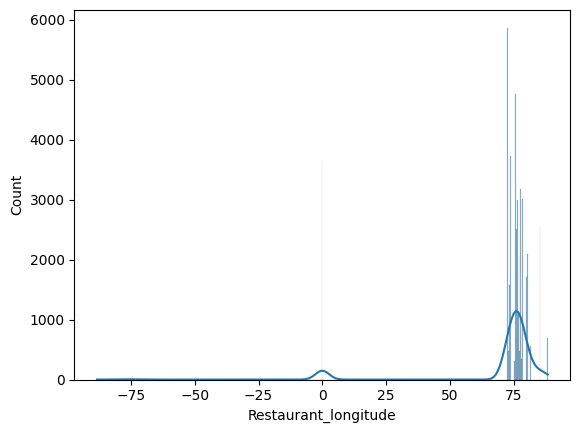

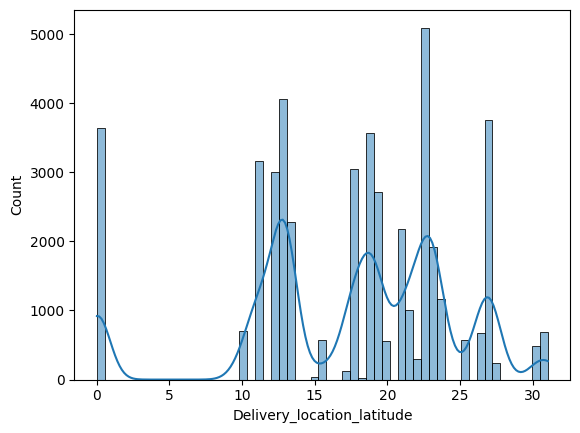

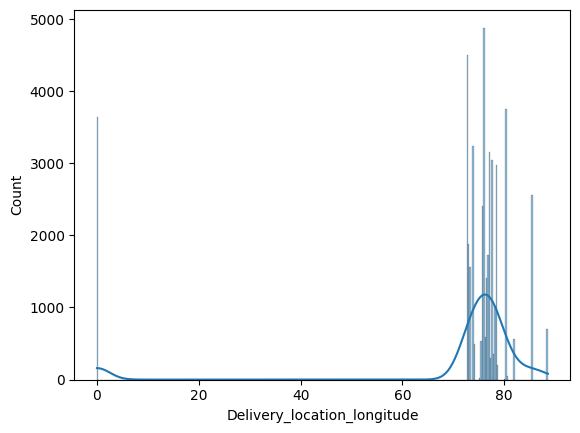

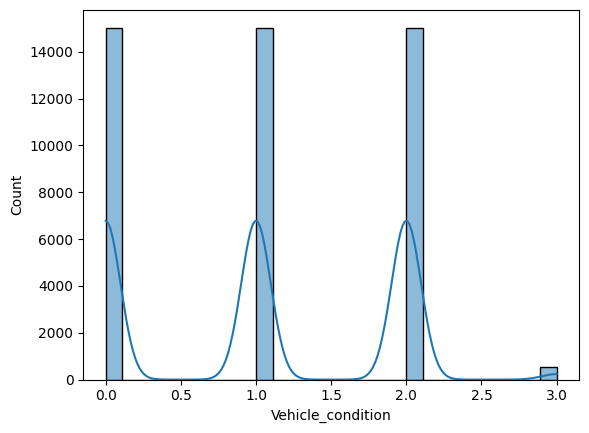

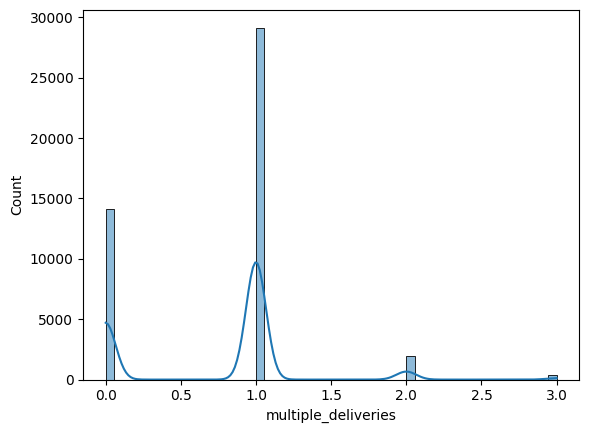

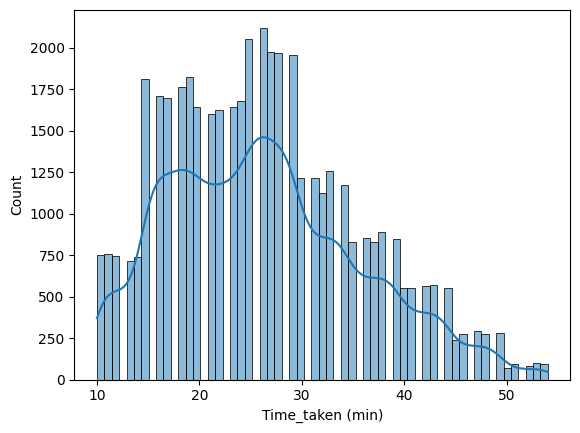

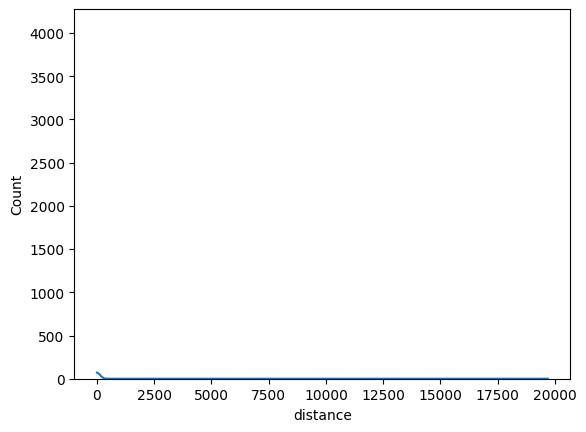

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
x=1 
for i in numerical_columns:
    sns.histplot(data=df,x=i,kde=True)
    plt.show()

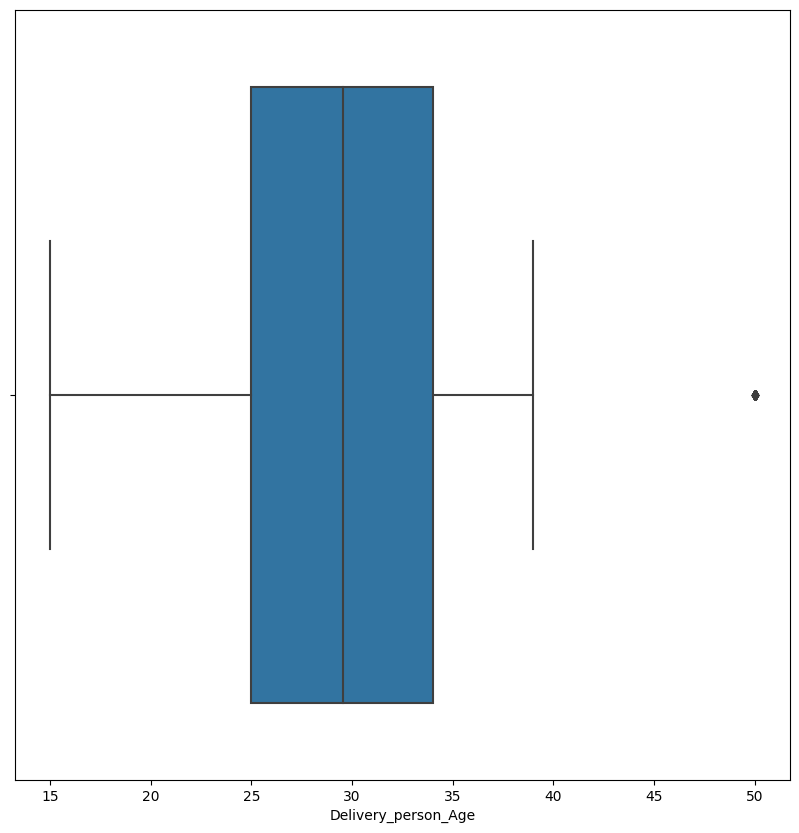

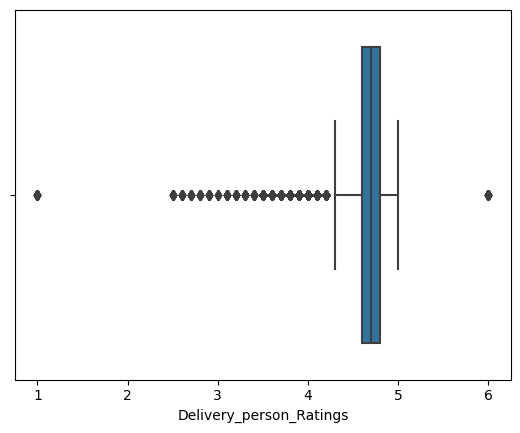

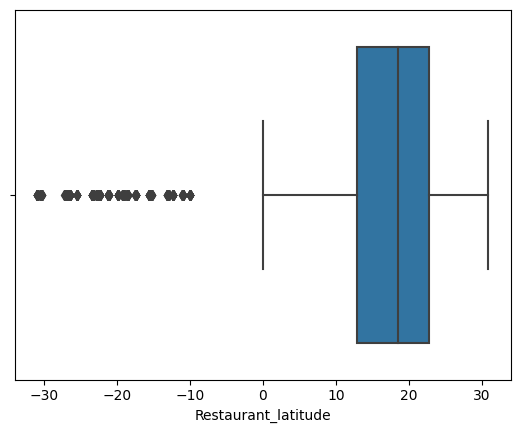

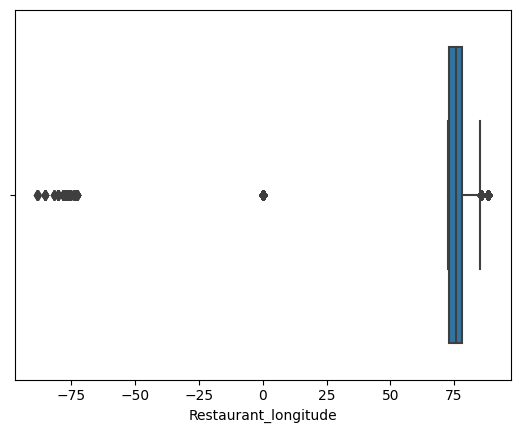

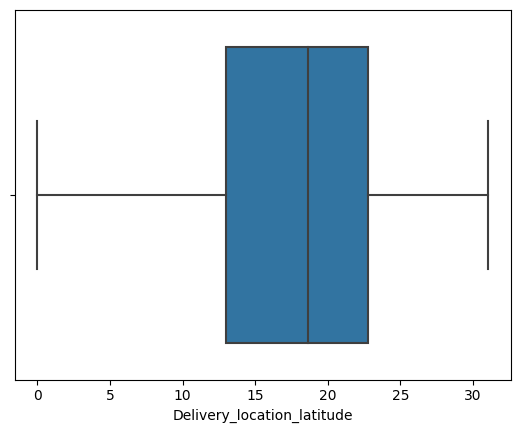

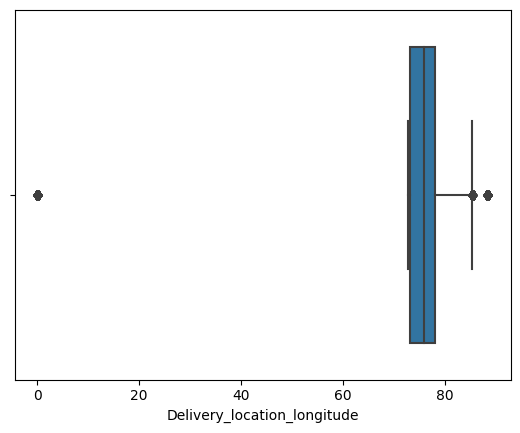

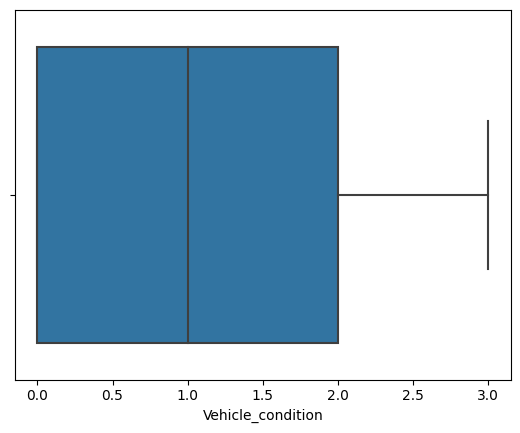

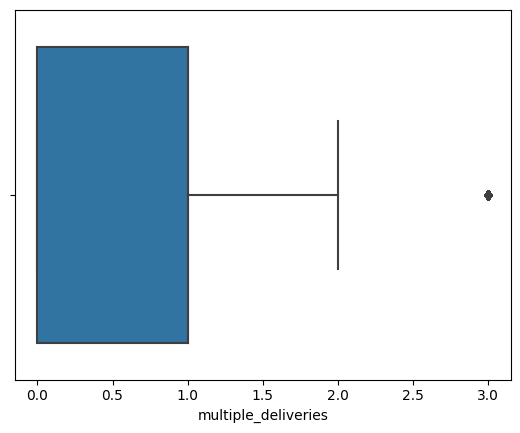

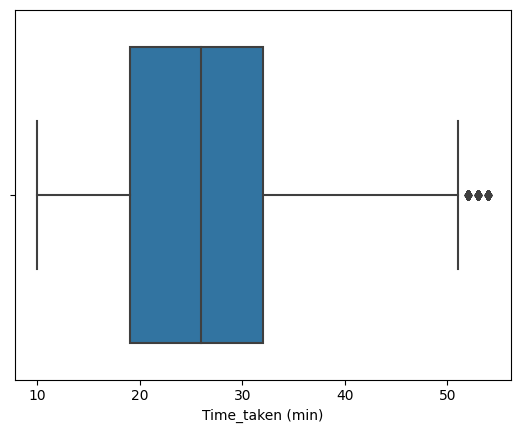

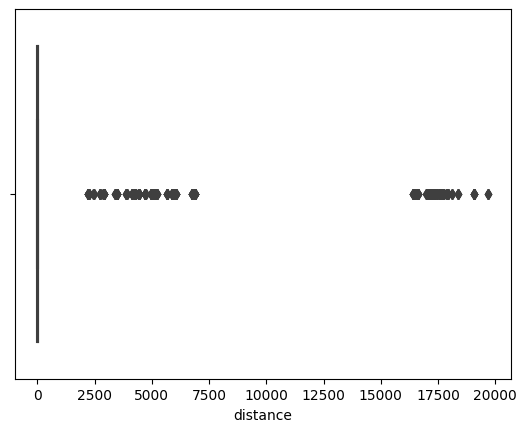

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,10))
x=1 
for i in numerical_columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [139]:
df.shape

(45153, 22)

In [140]:
df.to_csv("./data/finalTrain.csv")

In [142]:
df.dtypes

ID                              object
Delivery_person_ID              object
Delivery_person_Age            float64
Delivery_person_Ratings        float64
Restaurant_latitude            float64
Restaurant_longitude           float64
Delivery_location_latitude     float64
Delivery_location_longitude    float64
Time_Orderd                     object
Time_Order_picked               object
Weather_conditions              object
Road_traffic_density            object
Vehicle_condition                int64
Type_of_order                   object
Type_of_vehicle                 object
multiple_deliveries            float64
Festival                        object
City                            object
Time_taken (min)                 int64
distance                       float64
orderdate                       object
ordermonth                      object
dtype: object

In [143]:
df['orderdate'].astype('int')

0        12
1        13
2         4
3        13
4        14
         ..
45579    24
45580    16
45581    11
45582     7
45583     2
Name: orderdate, Length: 45153, dtype: int32

In [146]:
df['ordermonth'].astype('int')

0        2
1        2
2        3
3        2
4        2
        ..
45579    3
45580    2
45581    3
45582    3
45583    3
Name: ordermonth, Length: 45153, dtype: int32

<Axes: >

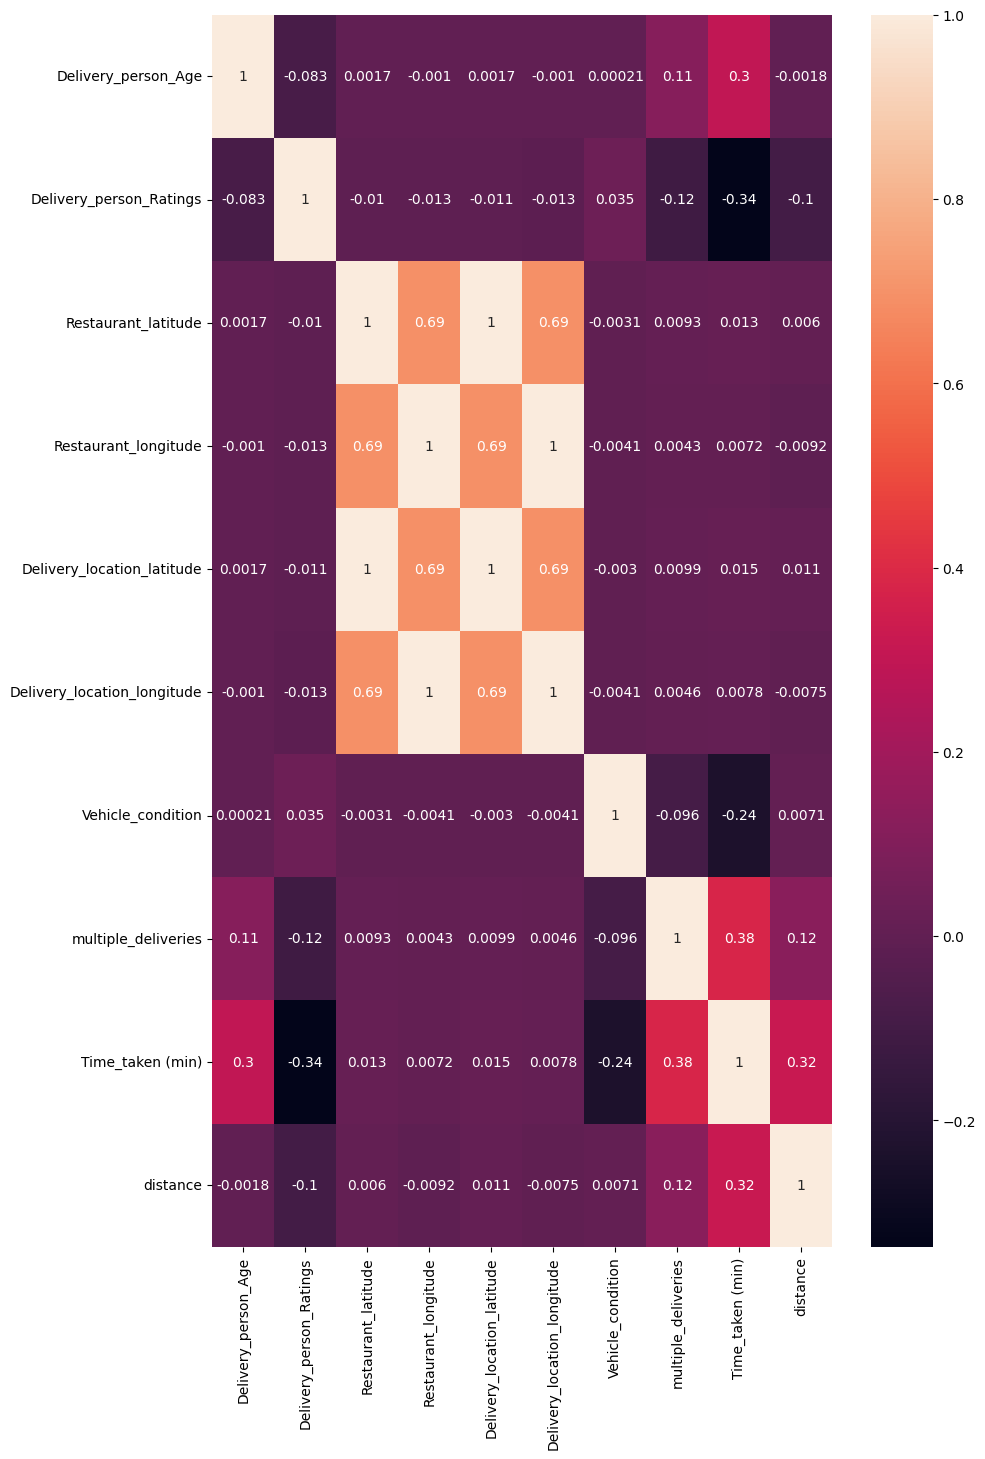

In [147]:
plt.figure(figsize=(10, 16))
sns.heatmap(df.corr(numeric_only=True),annot=True)